In [1]:
! pip install -U pip
! pip install -U torch==1.4.0
! pip install -U torchaudio==0.4.0
! pip install -U matplotlib==3.2.1
! pip install -U trains==0.15.0
! pip install -U tensorboard==2.2.1

Requirement already up-to-date: pip in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (20.1.1)
Requirement already up-to-date: torch==1.4.0 in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (1.4.0)
Requirement already up-to-date: torchaudio==0.4.0 in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (0.4.0)
Requirement already up-to-date: matplotlib==3.2.1 in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (3.2.1)
Requirement already up-to-date: trains==0.15.0 in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (0.15.0)
Requirement already up-to-date: tensorboard==2.2.1 in /home/sam/.pyenv/versions/3.7.4/envs/dan/lib/python3.7/site-packages (2.2.1)


In [2]:
import os
import torch
import torchaudio
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from trains import Task

%matplotlib inline

In [3]:
task = Task.init(project_name='Audio Example', task_name='data pre-processing')
configuration_dict = {'number_of_smaples': 3}
configuration_dict = task.connect(configuration_dict)  # enabling configuration override by trains
print(configuration_dict)  # printing actual configuration (after override in remote mode)

TRAINS Task: overwriting (reusing) task id=cc737581b6fc4dc28a0e4ce35ba617ce
TRAINS results page: https://demoapp.trains.allegro.ai/projects/469622fa0a1842f9a90947bdc1773aea/experiments/cc737581b6fc4dc28a0e4ce35ba617ce/output/log
{'number_of_smaples': 3}


In [4]:
tensorboard_writer = SummaryWriter('./tensorboard_logs')

In [5]:
if not os.path.isdir('./data'):
    os.mkdir('./data')
yesno_data = torchaudio.datasets.YESNO('./data', download=True)

In [6]:
def plot_signal(signal, title, cmap=None):
    plt.figure()
    if signal.ndim == 1:
        plt.plot(signal)
    else:
        plt.imshow(signal, cmap=cmap)    
    plt.title(title)
    plt.show()

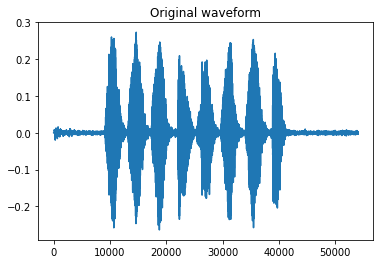

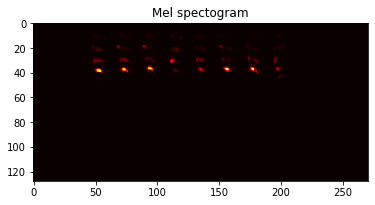

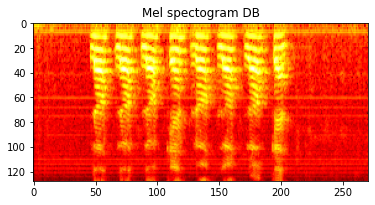

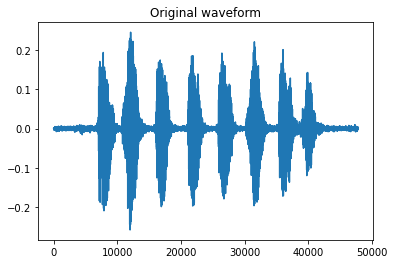

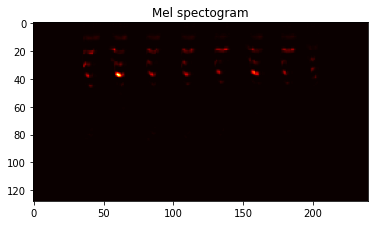

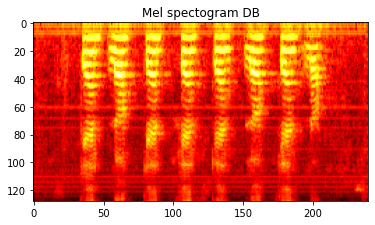

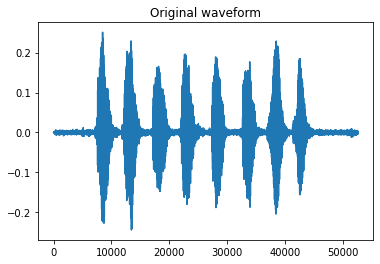

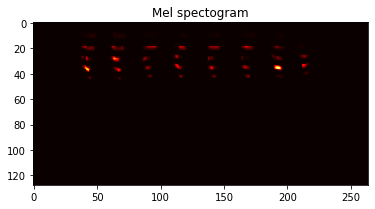

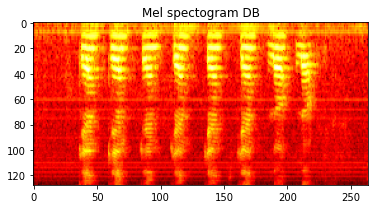

In [7]:
for n in range(configuration_dict.get('number_of_smaples', 3)):
    waveform, sample_rate, labels = yesno_data[n]
    melspectogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate)
    plot_signal(waveform[0,:], 'Original waveform')
    tensorboard_writer.add_audio('Audio samples/{}'.format(n), waveform, n, sample_rate)
    plot_signal(melspectogram_transform(waveform.squeeze()).numpy(), 'Mel spectogram', 'hot')
    plot_signal(torchaudio.transforms.AmplitudeToDB()(melspectogram_transform(waveform.squeeze())).numpy(), 'Mel spectogram DB', 'hot')